In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from vega_datasets import data

In [4]:
from dataviz import format_plot

In [6]:
import seaborn as sns

## Get Data

In [8]:
df_gpm_lxp = data.gapminder()
df_gpm_lxp.sample(10)

,year,country,cluster,pop,life_expect,fertility
384,2005,Iraq,5,26074906,59.545,4.2640
374,1955,Iraq,5,5903253,48.437,7.3000
389,1975,Ireland,1,3177300,72.030,3.4780
203,1980,Dominican Republic,3,5696855,63.727,4.0000
253,1955,France,1,43427669,68.930,2.7120
625,2000,South Africa,2,44066197,53.365,2.8020
188,1960,Cuba,3,7027210,65.246,4.6805
589,1985,Portugal,1,9897192,74.060,1.5940
526,2000,Nigeria,2,114306700,46.608,5.8450
433,1975,Japan,4,111573116,75.380,1.8100


---
# Interactive Visualization with Widgets

- IPython Widgets
- See: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

## 2a. Standalone Widgets

In [9]:
from ipywidgets import (Dropdown, IntSlider, FloatSlider, ToggleButtons, SelectMultiple)

### Dropdown

In [11]:
widget_fruits = Dropdown(value='apples', 
                  description='Pick one:',
                  options=['apples', 'grapes', 'bananas', 'oranges'])
widget_fruits

Dropdown(description='Pick one:', options=('apples', 'grapes', 'bananas', 'oranges'), value='apples')

In [13]:
print(f"You selected {widget_fruits.value}")

You selected bananas


### Slider

In [20]:
ages = IntSlider(description="Age: ",
                     value=30, 
                     min=20, 
                     max=50, 
                     step=1)
print()
ages

IntSlider(value=30, description='Age: ', max=50, min=20)

In [21]:
print(f"You selected {ages.value}")

You selected 30


### Toggle

In [22]:
rsvp = ToggleButtons(value='Maybe', options=['No', 'Yes', 'Maybe'], description='Call me:')
rsvp

ToggleButtons(description='Call me:', index=2, options=('No', 'Yes', 'Maybe'), value='Maybe')

In [24]:
print(f"You selected {rsvp.value}")

You selected Yes


### Select

In [25]:
lunch = SelectMultiple(description='Lunch order', options=['spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'])
lunch

SelectMultiple(description='Lunch order', options=('spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'…

In [26]:
print(f"You selected {lunch.value}")

You selected ('spaghetti', 'salad')


## 2b. Interactive Charts

In [16]:
from ipywidgets import interactive

# Histogram of Life Expectancy in any given Year

## Example 1. Hardcoded

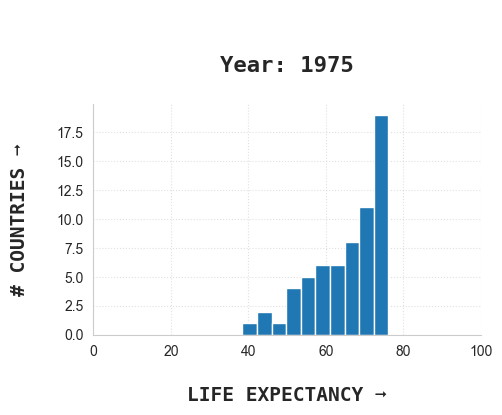

In [31]:
ax = df_gpm_lxp.query("year==1975").loc[:, 'life_expect'].plot.hist(figsize=(5, 3))
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("# Countries")
ax.set_xlim(0, 100)
ax.set_title("Year: 1975")

format_plot(ax)

## Example 2: Parameterized

- We use a Python function that takes the year as an argument, to plot the histogram
- Try changing the value of int_year and observe the changes

In [32]:
def plot_hist_lifeexp(int_year):
    """
    """
    ax = df_gpm_lxp.query(f"year=={int_year}").loc[:, 'life_expect'].plot.hist(figsize=(5, 3))
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("# Countries")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 30)
    ax.set_title(f"Year: {int_year}")
    
    format_plot(ax)

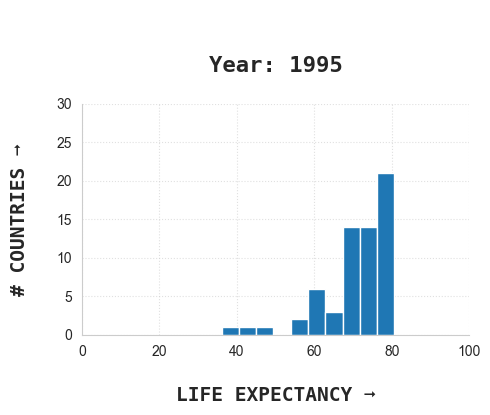

In [37]:
plot_hist_lifeexp(int_year=1995)

## Example 3: Interactive

- We allow the user to select a value for the year
- And pass it to a function that generates the visualization
- We then use the `interactive` function from ipywidgets which requires
    - A widget that catches the value selected by the user and passes it to
    - A function that does something with this value, such as making a plot

In [38]:
from ipywidgets import interactive

In [56]:
interactive(
    plot_hist_lifeexp, 
    int_year=Dropdown(
        description='Select Year',
        value=1970,
        options=df_gpm_lxp.year.unique()
    )
)

interactive(children=(Dropdown(description='Select Year', index=3, options=(np.int64(1955), np.int64(1960), np…

<br>

---

# Exercise

<big>

Use the stocks data from vega_datasets to
- allow the user to select one or many symbols
- plot them all on the same line chart

<br>

In [42]:
df_stocks = data.stocks()
df_stocks.sample(5)

,symbol,date,price
72,MSFT,2006-01-01,26.14
321,IBM,2006-04-01,77.05
190,AMZN,2005-08-01,42.70
42,MSFT,2003-07-01,21.56
434,GOOG,2010-01-01,529.94


In [25]:
df_stocks.symbol.unique().tolist()

['MSFT', 'AMZN', 'IBM', 'GOOG', 'AAPL']

In [51]:
def plot_stocks(list_symbols):
    """
    """
    ax = df_stocks.query(f"symbol in {list_symbols}").pivot(index='date', columns='symbol', values='price').plot(figsize=(7, 3))
    ax.set_ylabel("Price")
    format_plot(ax)

## Use the `SelectMultiple` widget

- Allows users to select multiple items from a list (by holding down the CTRL key and clicking on items)
- Returns the items selected as a list

In [55]:
interactive(plot_stocks,
            list_symbols=SelectMultiple(
                description="Pick companies to compare",
                value=['AAPL'],
                options=df_stocks.loc[:, 'symbol'].unique().tolist()))

interactive(children=(SelectMultiple(description='Pick companies to compare', index=(4,), options=('MSFT', 'AM…

## 2c. Animation

In [57]:
from ipywidgets import Play

In [48]:
Play?

Init signature: Play(value=None, min=None, max=None, step=None, **kwargs)
Docstring:     
Play/repeat buttons to step through values automatically, and optionally loop.
    
Init docstring: Public constructor
File:           ~/Code/cst4150/.fintech/lib/python3.14/site-packages/ipywidgets/widgets/widget_int.py
Type:           MetaHasTraits
Subclasses:     

In [67]:
play = Play(
    interval=200,
    value=1955,
    min=1955,
    max=2005,
    step=5,
    description="Press play",
    disabled=False
)

interactive_plot = \
interactive(
    lambda year: format_plot(df_gpm_lxp
                             .query(f"year=={year}")
                             .loc[:, 'life_expect']
                             .plot
                             .hist(bins=20, 
                                   xlim=(0, 100), 
                                   ylim=(0, 30),
                                   title=f"Global Life Expectancy in {year}", 
                                   figsize=(8, 5))), 
    year=play)

# output = interactive_plot.children[-1]
interactive_plot

interactive(children=(Play(value=1955, description='Press play', interval=200, max=2005, min=1955, step=5), Ou…

In [97]:
def make_scatter_gapminder(year):
    """
    """
    format_plot(df_gpm_lxp
        .query(f"year=={year}")
        .assign(npop=lambda fr: fr['pop'].divide(fr['pop'].max()).multiply(150))
        .plot.scatter(x='fertility', 
                      y='life_expect', 
                      s='npop', 
                      c='cluster',
                      xlim=(0, 12),
                      ylim=(0, 100),
                      title=year,
                      cmap='Spectral'))

In [98]:
play = Play(
    interval=600,
    value=1955,
    min=1955,
    max=2005,
    step=5,
    description="Press play",
    disabled=False
)

interactive(make_scatter_gapminder, year=play)

interactive(children=(Play(value=1955, description='Press play', interval=600, max=2005, min=1955, step=5), Ou…